    ClassId                                           SignName
0         0                                              Yield
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                               Speed limit (20km/h)
14       14                                            

/Users/anggetong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


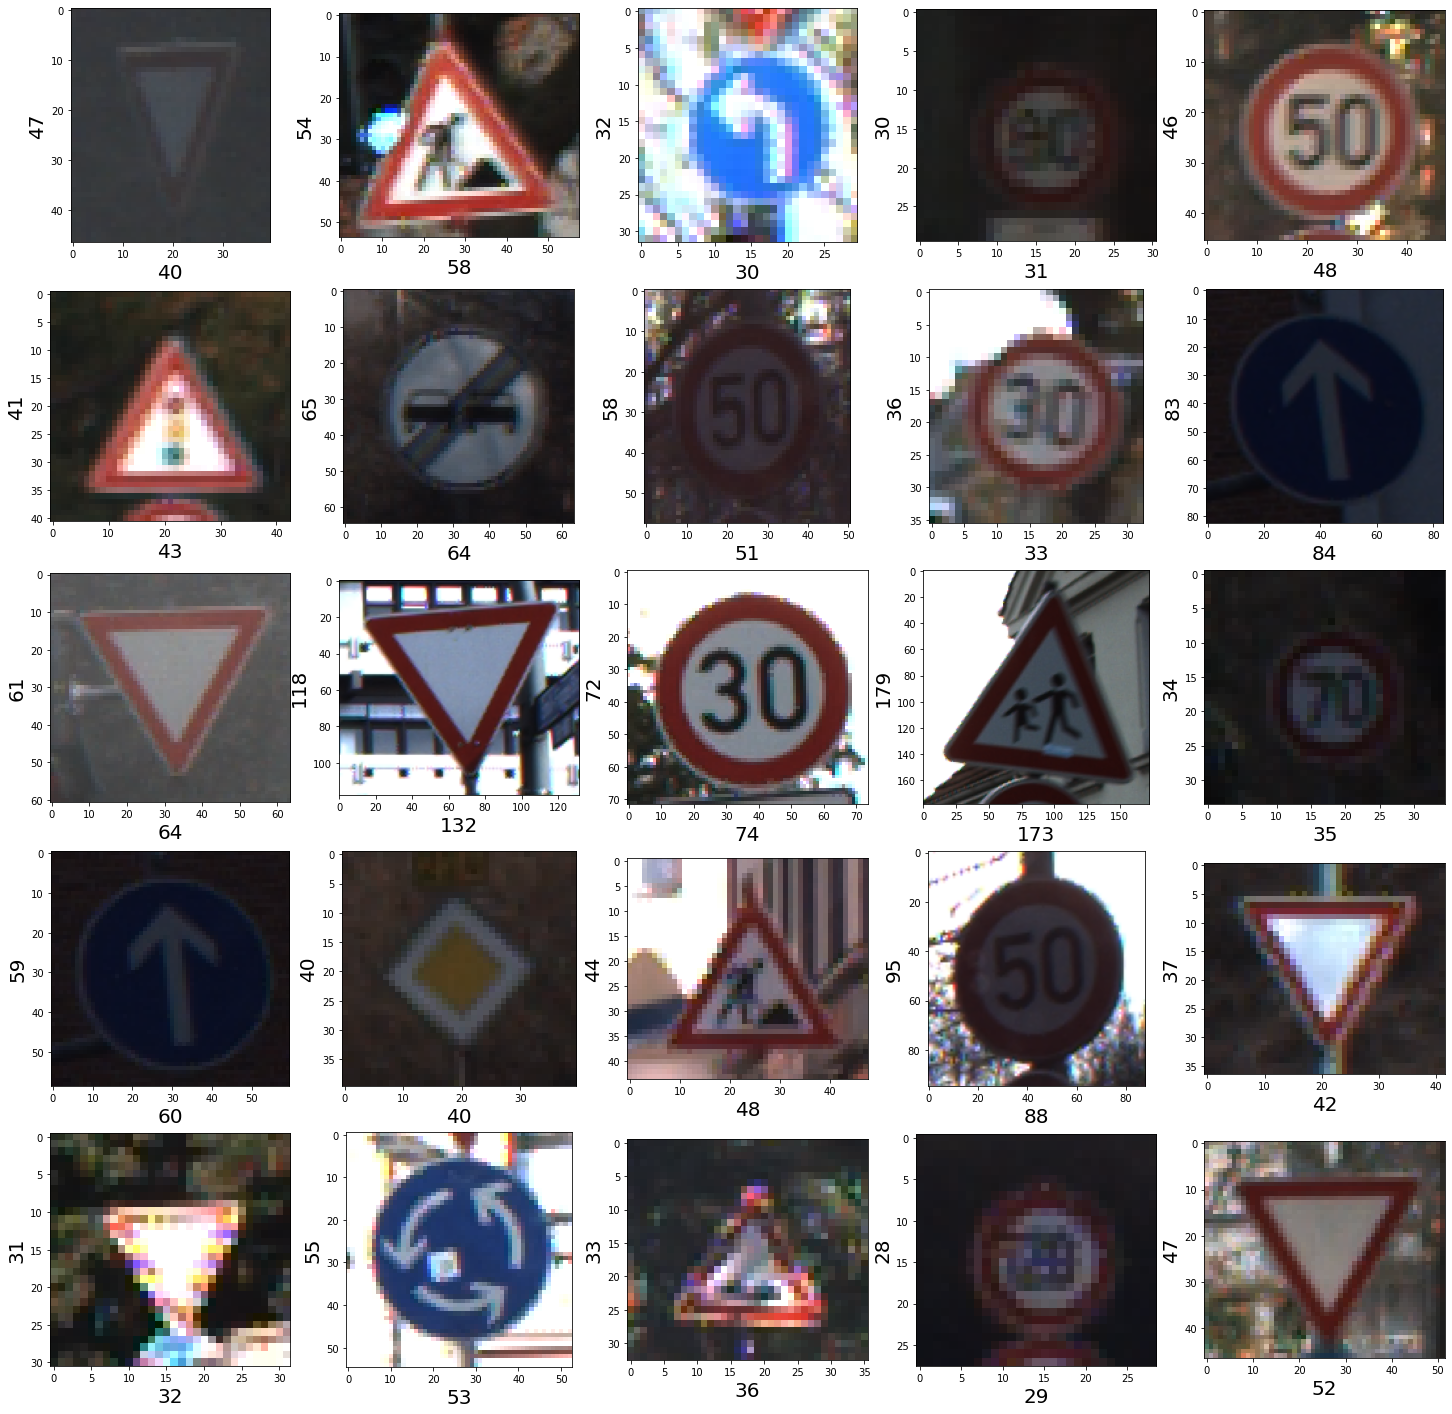

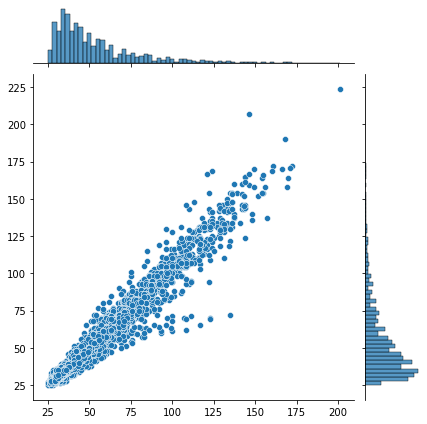

/Users/anggetong/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


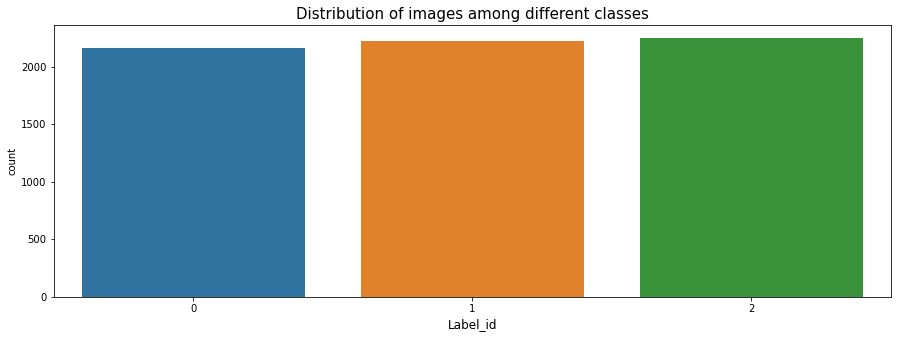

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 109, 109, 32)      2432      
_________________________________________________________________
activation_21 (Activation)   (None, 109, 109, 32)      0         
_________________________________________________________________
average_pooling2d_8 (Average (None, 54, 54, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 25, 25, 32)        25632     
_________________________________________________________________
activation_22 (Activation)   (None, 25, 25, 32)        0         
_________________________________________________________________
average_pooling2d_9 (Average (None, 12, 12, 32)       

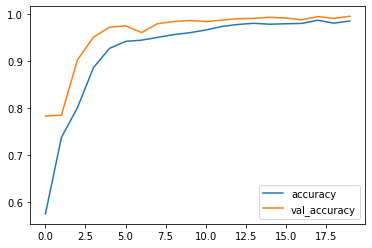

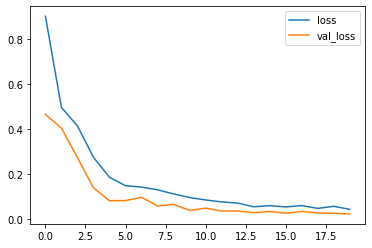

In [9]:
import pandas as pd
import tensorflow as tf
import keras
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, AveragePooling2D, Activation
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image


lab = pd.read_csv ('TrafficSigns/Labels.csv')

print(lab)

dir_path = 'TrafficSigns'

os.listdir(dir_path)


# Assigning the path for train and test images

train_path = dir_path + '/Train'
test_path = dir_path + '/Test'


print(sorted(os.listdir(train_path)))

sorted(os.listdir(test_path))

# Visualizing 25 random sample images from test set

images_path = os.listdir(test_path)

plt.figure(figsize=(25, 25))

for i in range(1, 26):
    plt.subplot(5, 5, i)
    random_img_path = test_path + '/' + random.choice(images_path)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize=20)  # width of image
    plt.ylabel(rand_img.shape[0], fontsize=20)  # height of image

dim1 = []
dim2 = []

for i in range(0,3):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

sns.jointplot(dim1, dim2)
plt.show()

np.mean(dim1)

np.mean(dim2)

# Since the mean of both dimensions is around 50 , we will use (50x50) as the shape of images.

#image_shape = (50, 50)

image_shape = (218,218)

images = []
label_id = []

for i in range(3):
    labels = train_path + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize(image_shape)
        img = np.array(img)
        images.append(img)
        label_id.append(i)


# Converting images into numpy array
images = np.array(images)

images = images / 255

label_id = np.array(label_id)
label_id.shape

images.shape

plt.figure(figsize=(15, 5))
sns.countplot(label_id)
plt.title('Distribution of images among different classes', fontsize=15)
plt.xlabel('Label_id', fontsize=12)
plt.show()

np.save('Training_set', images)
np.save('Label_Id', label_id)

# Splitting the train data into train and validation data

images = np.load('Training_set.npy')
label_id = np.load('Label_Id.npy')

# Splitting the data

x_train, x_val, y_train, y_val = train_test_split(images, label_id, test_size=0.2, random_state=3)

y_train_cat = to_categorical(y_train)

y_val_cat = to_categorical(y_val)


# Model Building

model_1 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))


## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(AveragePooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))


## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(AveragePooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(120))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(84))
model_1.add(Activation('relu'))
model_1.add(Dense(10))
model_1.add(Activation('softmax'))

model_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_1.summary()

# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

model_1.fit(
    x_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(x_val, y_val),
#     callbacks=[early_stopping],
    verbose=2

)

# Saving the model
model_1.save('Model.h5')

# Model Evaluation

evaluation = pd.DataFrame(model_1.history.history)

evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()


model_1 = load_model('Model.h5')